# Homework 4 Spring 2022

### Eshan Kumar

### ek3227

TODO:
- make sure last two models are correct (dropout/batchnorm in correct place)
- answer last two questions
- Answer part 1, backprop from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pprint 
pp = pprint.PrettyPrinter(indent=4)


# Part 1: Feed forward network from scratch!

For this part, you are not allowed to use any library other than numpy. 

In this part, you will will implement the forward pass and backward pass (i.e. the derivates of each parameter wrt to the loss) for the following neural network:

<img src="images/nn.png" width=400 height=400/>

The weight matrix for the hidden layer is W1 and has bias b1. 

The weight matrix for the ouput layer is W2 and has bias b2.

Activatation function is **sigmoid** for both hidden and output layer

Loss function is the MSE loss $$L(y,y_t) = \frac{1}{2N}\sum_{n=1}^{N}(y^n - y_{t}^{n})^2$$

Refer to the below dictionary for dimensions for each matrix

In [2]:
np.random.seed(0) # don't change this

weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [4]:
#Implement the forward pass
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation
    
    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    
    Z2 = np.dot(H, weights['W2'].T + weights['b2'])
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [109]:
# Implement the backward pass
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T)) #RMSE Loss
    
    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    
    dLdW2 = np.dot(H.T, dLdZ2)
    dLdb2 = np.sum(dLdZ2, axis=0, keepdims=True)
    
    dLdH = np.dot(dLdZ2[:,None], weights['W2'][None,:])
    dLdZ1 =  np.multiply(dLdH, (sigmoid(Z1)*(1 - sigmoid(Z1))))
    
    dLdW1 = np.dot(X.T, dLdZ1)
    dLdb1 = np.sum(dLdZ1, axis=0, keepdims=True)
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    
    return gradients, L

In [110]:
gradients, L = back_propagation(X, Y, weights)
print(L)

(1000, 3)
(1000, 3)
0.1332476222330792


In [111]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596, -0.00030765, -0.00034768],
       [ 0.00262019, -0.00024188, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([[ 0.00492577, -0.00058023, -0.00065977]]),
    'b2': array([0.02924923])}


Your answers should be close to L = 0.133 and 
'b1': array([ 0.00492, -0.000581, -0.00066]). You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

You can use any library for the following questions.

# Part 2: Fashion MNIST dataset
The Fashion-MNIST dataset is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It's commonly used as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning models. You can read more about the dataset at the [Fashion-MNIST homepage](https://github.com/zalandoresearch/fashion-mnist). 

We will utilize tensorflow to import the dataset, however, feel free to use any framework (TF/PyTorch) to answer the assignment questions.

In [8]:
from tensorflow.keras.datasets import fashion_mnist

# load data
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

### 2.1 Plot the first 25 samples from both development and test sets on two separate 5$\times $5 subplots. 

Each image in your subplot should be labelled with the ground truth label. Get rid of the plot axes for a nicer presentation. You should also label your plots to indicate if the plotted data is from development or test set. You are given the expected output for development samples.

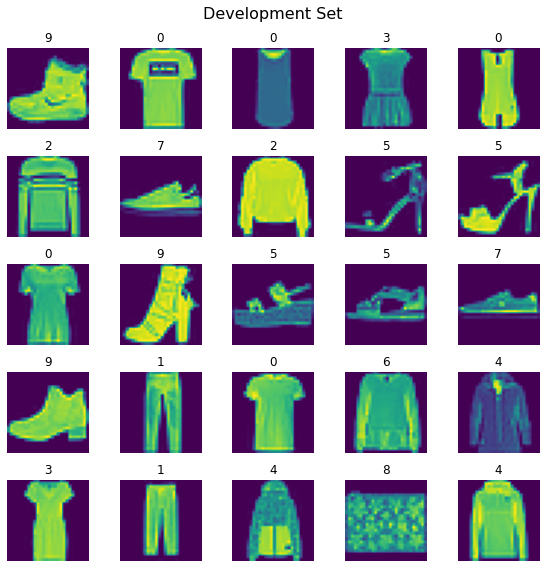

In [12]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(5,5, figsize=(8,8))
fig.suptitle('Development Set', fontsize=16)
for i, subplot in enumerate(ax.flatten()):
    subplot.imshow(xdev[i], cmap=plt.get_cmap('viridis'))
    subplot.axis('off')
    subplot.set_title(ydev[i])
fig.tight_layout()
plt.show()

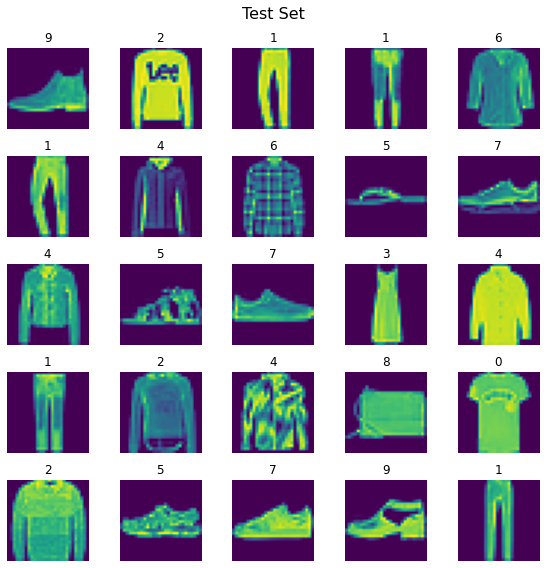

In [14]:
fig, ax = plt.subplots(5,5, figsize=(8,8))
fig.suptitle('Test Set', fontsize=16)
for i, subplot in enumerate(ax.flatten()):
    subplot.imshow(xtest[i], cmap=plt.get_cmap('viridis'))
    subplot.axis('off')
    subplot.set_title(ytest[i])
fig.tight_layout()
plt.show()

# Part 3: Feed Forward Network

In this part of the homework, we will build and train a deep neural network on the Fashion-MNIST dataset.

### 3.1.1 Print their shapes - $x_\text{dev}, y_{\text{dev}}, x_\text{test}, y_\text{test}$

In [15]:
print(f"Shape of X_dev:\t\t{xdev.shape}")
print(f"Shape of y_dev:\t\t{ydev.shape}")
print(f"\nShape of X_test:\t{xtest.shape}")
print(f"Shape of y_test:\t{ytest.shape}")

Shape of X_dev:		(60000, 28, 28)
Shape of y_dev:		(60000,)

Shape of X_test:	(10000, 28, 28)
Shape of y_test:	(10000,)


### 3.1.2 Flatten the images into one-dimensional vectors. Again, print out the shapes of $x_\text{dev}, x_\text{test}$

In [16]:
# Flatten and print
xdev_flat = xdev.reshape((len(xdev), -1))
xtest_flat = xtest.reshape((len(xtest), -1))

print(f"Shape of X_dev after flattening:\t{xdev_flat.shape}")
print(f"Shape of X_test after flattening:\t{xtest_flat.shape}")

Shape of X_dev after flattening:	(60000, 784)
Shape of X_test after flattening:	(10000, 784)


### 3.1.3 Standardize the development and test sets. 

Note that the images are 28x28 numpy arrays, and each pixel takes value from 0 to 255.0. 0 means background (white), 255 means foreground (black).

In [17]:
# Standardize - or make every value between 0 and 1
print(f"X_dev before standardizing:\n\tmin: {min(xdev_flat[0])}\n\
    \tmax: {max(xdev_flat[0])}\n\tavg: {xdev_flat[0].mean()}")
X_dev = xdev_flat/255.0
X_test = xtest_flat/255.0
print(f"\nX_dev after standardizing:\n\tmin: {min(X_dev[0])}\n\
    \tmax: {max(X_dev[0])}\n\tavg: {X_dev[0].mean()}")

X_dev before standardizing:
	min: 0
    	max: 255
	avg: 97.25382653061224

X_dev after standardizing:
	min: 0.0
    	max: 1.0
	avg: 0.3813875550220088


### 3.1.4 Assume your neural network has softmax activation as the last layer activation. Would you consider encoding your target variable? Which encoding would you choose and why? The answer depends on your choice of loss function too, you might want to read 3.2.1 and 3.2.5 before answering this one!

Encode the target variable else provide justification for not doing so. Supporting answer may contain your choice of loss function.


##### Because we are classifying an image into one of 10 categories, the output must be one hot encoded so that it can be properly compared to the output of the Neural network

In [18]:
from tensorflow.keras.utils import to_categorical
print(f"Shape of y_dev before one-hot encoding:\t\t{ydev.shape}")
y_dev = to_categorical(ydev)
y_test = to_categorical(ytest)
print(f"Shape of y_dev after one-hot encoding:\t\t{y_dev.shape}")

Shape of y_dev before one-hot encoding:		(60000,)
Shape of y_dev after one-hot encoding:		(60000, 10)


### 3.1.5 Train-test split your development set into train and validation sets (8:2 ratio). 

Note that splitting after encoding does not causes data leakage here because we know all the classes beforehand.

In [20]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.2, random_state=42)
print(f"Shape of X_dev:\t\t{X_dev.shape}")
print(f"Shape of y_dev:\t\t{y_dev.shape}")

print(f"\n\tShape of X_train:\t{X_train.shape}")
print(f"\tShape of y_train:\t{y_train.shape}")
print(f"\n\tShape of X_val:\t\t{X_val.shape}")
print(f"\tShape of y_val:\t\t{y_val.shape}")

Shape of X_dev:		(60000, 784)
Shape of y_dev:		(60000, 10)

	Shape of X_train:	(48000, 784)
	Shape of y_train:	(48000, 10)

	Shape of X_val:		(12000, 784)
	Shape of y_val:		(12000, 10)


### 3.2.1 Build the feed forward network

Using Softmax activation for the last layer and ReLU activation for every other layer, build the following model:

1. First hidden layer size - 128
2. Second hidden layer size - 64
3. Third and last layer size - You should know this



In [21]:
# build model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

model = Sequential([
    Dense(128, input_shape=(784,)),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(len(np.unique(ydev))),
    Activation('softmax')
])

### 3.2.2 Print out the model summary

In [22]:
# print summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trai

### 3.2.3 Report the total number of trainable parameters. Do you think this number is dependent on the image height and width? Only Yes/No required. 

##### The total number of trainable parameters is 109,386. Yes, this is definitely dependent on image height and width.

### 3.2.4 Print out your model's output on first train sample. This will confirm if your dimensions are correctly set up. Is the sum of this output equal to 1 upto two decimal places?

In [23]:
#Add dimension to simulate batch size of 1
print(f"First train sample shape:\t{X_train[0].shape}")
test_input = np.expand_dims(X_train[0], axis=0) 
print(f"Input shape:\t\t\t{test_input.shape}")

output = model(test_input)
print(f"\nOutput array: {output}")
print(f"\nSum of array vals: {np.sum(output)}")


First train sample shape:	(784,)
Input shape:			(1, 784)

Output array: [[0.09753377 0.07208797 0.12919307 0.09951729 0.0672017  0.14323287
  0.13319893 0.08867356 0.11141518 0.05794565]]

Sum of array vals: 0.9999999403953552


##### The sum of this output is almost equal to 1, because this output array represents the predicted probabilities that this input belongs to classes 1-10, and probabilities will always sum to 1.

### 3.2.5 Considering the output of your model and overall objective, what loss function would you choose and why? Choose a metric for evaluation and explain the reason behind your choice.

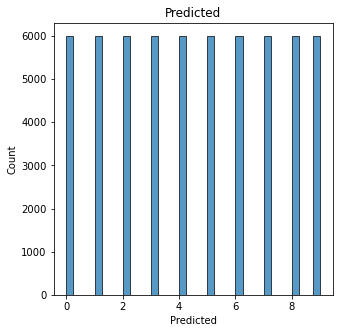

In [24]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.histplot(ydev)
plt.title("Predicted")
plt.xlabel("Predicted")
plt.show()

##### Considering the output of the model, which is a vector, and the overall objective, which is categorization, I would choose categorical crossentropy, because this works well for multiclass classification tasks. It summarizes the average difference between the actual and predicted probability distributions for all classes. We would like our model to minimize this, so it makes sense for this problem.  

##### I choose Accuracy since as we can see in the plot above, it appears that we are not dealing with an imbalanced dataset, so accuracy should suffice.


### 3.2.6 Using the metric and loss function above, with Adam as the optimizer, train your model for 20 epochs with batch size 128. 

Make sure to save and print out the values of loss function and metric after each epoch for both train and validation sets.

Note - Use appropriate learning rate for the optimizer, you might have to try different values

In [25]:
# train
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
allScores = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_val, y_val))

Epoch 1/20
 53/375 [===>..........................] - ETA: 0s - loss: 0.9890 - accuracy: 0.6700 

2022-04-13 15:21:08.228717: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


375/375 [==============================] - 1s 1ms/step - loss: 0.5730 - accuracy: 0.8034 - val_loss: 0.4542 - val_accuracy: 0.8393
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4000 - accuracy: 0.8585 - val_loss: 0.4010 - val_accuracy: 0.8554
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8711 - val_loss: 0.3678 - val_accuracy: 0.8692
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3325 - accuracy: 0.8793 - val_loss: 0.3326 - val_accuracy: 0.8796
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.3114 - accuracy: 0.8874 - val_loss: 0.3391 - val_accuracy: 0.8767
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.2959 - accuracy: 0.8915 - val_loss: 0.3308 - val_accuracy: 0.8804
Epoch 7/20
375/375 [==============================] - 0s 1ms/step - loss: 0.2815 - accuracy: 0.8957 - val_loss: 0.3153 - val_accuracy: 0.8853
Epoch 8/20
375/37

### 3.2.7 Plot two separate plots displaying train vs validation loss and train vs validation metric scores over each epoch

In [26]:
import pandas as pd
hist = pd.DataFrame(allScores.history)
display(hist)

,loss,accuracy,val_loss,val_accuracy
0,0.573005,0.803417,0.454223,0.839250
1,0.400025,0.858521,0.401001,0.855417
2,0.359714,0.871063,0.367821,0.869250
3,0.332487,0.879292,0.332593,0.879583
4,0.311424,0.887417,0.339062,0.876667
5,0.295903,0.891542,0.330757,0.880417
6,0.281525,0.895750,0.315301,0.885333
7,0.272052,0.899542,0.330054,0.880917
8,0.262885,0.903708,0.307755,0.888167
9,0.249004,0.908729,0.315271,0.886667


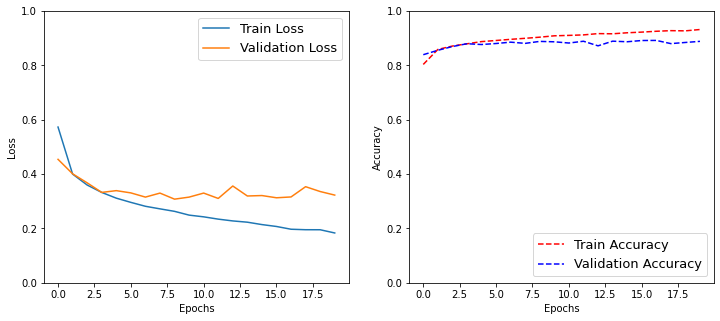

In [27]:
"""
fig, ax = plt.subplots()
ax.plot(hist.index, hist["loss"], label='Train Loss')
ax.plot(hist.index, hist["val_loss"], label='Validation Loss')
ax.set_ylabel("Loss")
ax.set_ylim([0, 1])
#ax2 = ax.twinx()
ax2.plot(hist.index, hist["accuracy"], 'r--', label='Train Accuracy')
ax2.plot(hist.index, hist["val_accuracy"], 'b--', label='Validation Accuracy')
ax2.set_ylabel("Accuracy")
ax2.set_ylim([0, 1])
ax.set_xlabel("Epochs")
fig.legend(fancybox=True, prop={'size':13}, loc='right', bbox_to_anchor=(1.35, 0.5))
plt.show()"""

fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(hist.index, hist["loss"], label='Train Loss')
ax[0].plot(hist.index, hist["val_loss"], label='Validation Loss')
ax[0].set_ylabel("Loss")
ax[0].set_ylim([0, 1])
ax[0].set_xlabel("Epochs")
ax[0].legend(fancybox=True, prop={'size':13}, loc='upper right')

ax[1].plot(hist.index, hist["accuracy"], 'r--', label='Train Accuracy')
ax[1].plot(hist.index, hist["val_accuracy"], 'b--', label='Validation Accuracy')
ax[1].set_ylabel("Accuracy")
ax[1].set_ylim([0, 1])
ax[1].set_xlabel("Epochs")
ax[1].legend(fancybox=True, prop={'size':13}, loc='lower right')
plt.show()

### 3.3.1 Report metric score on test set

In [28]:
# evaluate
score = model.evaluate(X_test, y_test, verbose=1)
print("Test loss:\t{:.3f}".format(score[0]))
print("Test accuracy:\t{:.3f}".format(score[1]))

313/313 [==============================] - 0s 379us/step - loss: 0.3503 - accuracy: 0.8834
Test loss:	0.350
Test accuracy:	0.883


### 3.3.2 Plot confusion matrix on the test set and label the axes appropriately with true and predicted labels. 

Labels on the axes should be the original classes (0-9) and not one-hot-encoded. To achieve this, you might have to reverse transform your model's predictions. Please look into the documentation of your target encoder. Sample output is provided

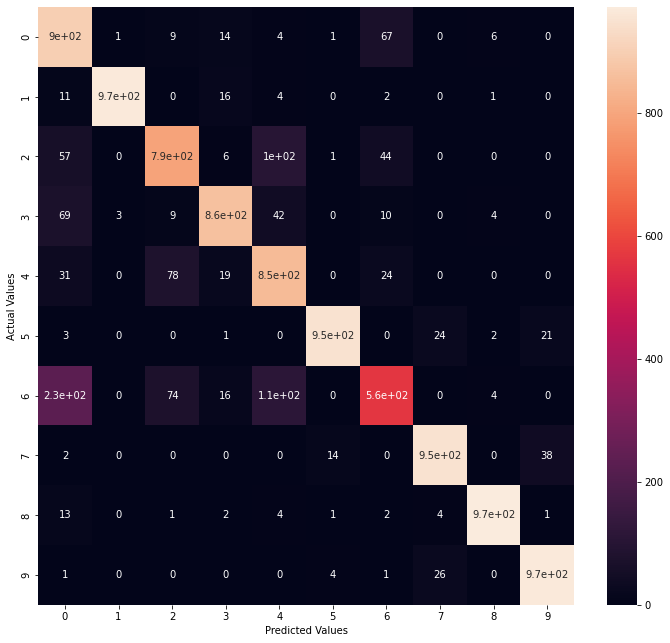

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_test_pred = model.predict(X_test)
y_test_pred_labels = [np.argmax(x) for x in np.round(y_test_pred)]
cf_matrix = confusion_matrix(ytest, y_test_pred_labels)

fig, ax = plt.subplots(figsize=(12,11))
sns.heatmap(cf_matrix, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

### 3.3.3 Plot the first 25 samples of test dataset on a 5$\times $5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). 

For instance, an image of class 3, with predicted class 7 should have the label GT:3, P:7. Get rid of the plot axes for a nicer presentation.

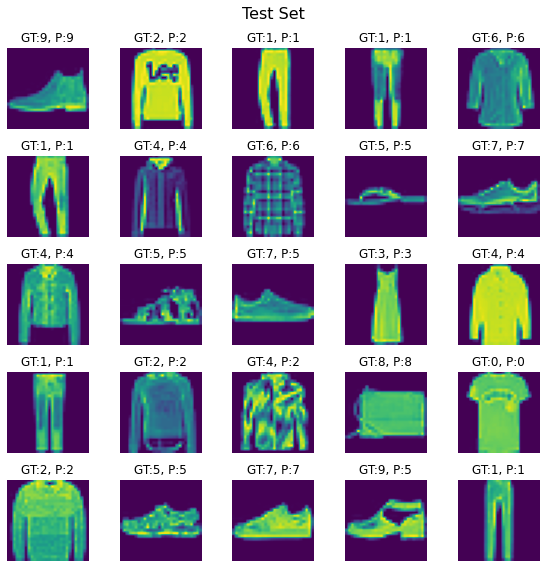

In [30]:
fig, ax = plt.subplots(5,5, figsize=(8,8))
fig.suptitle('Test Set', fontsize=16)
for i, subplot in enumerate(ax.flatten()):
    subplot.imshow(xtest[i], cmap=plt.get_cmap('viridis'))
    subplot.axis('off')
    subplot.set_title("GT:"+str(ytest[i])+", P:"+str(y_test_pred_labels[i]))
fig.tight_layout()
plt.show()

# Part 4: Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network, LeNet-5, on the Fashion-MNIST dataset. 

In [31]:
from tensorflow.keras.datasets import fashion_mnist

# load data again
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

### 4.1 Preprocess

1. Standardize the datasets

2. Encode the target variable.

3. Split development set to train and validation sets (8:2).

In [32]:
# Standardizing datasets
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

print("\n\nStandardizing Datasets:")
print(f"X_dev before standardizing:\n\tmin: {np.min(xdev[0])}\n\
    \tmax: {np.max(xdev[0])}\n\tavg: {np.mean(xdev[0])}")
X_dev = xdev/255.0
X_test = xtest/255.0
print(f"\nX_dev after standardizing:\n\tmin: {np.min(X_dev[0])}\n\
    \tmax: {np.max(X_dev[0])}\n\tavg: {np.mean(X_dev[0])}")

# Encoding target variables
print("\n\nEncoding target variables:")
print(f"Shape of y_dev before one-hot encoding:\t\t{ydev.shape}")
y_dev = to_categorical(ydev)
y_test = to_categorical(ytest)
print(f"Shape of y_dev after one-hot encoding:\t\t{y_dev.shape}")

# Splitting into train and validation
print("\n\nSplitting development set:")
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.2, random_state=42)
print(f"Shape of X_dev:\t\t{X_dev.shape}")
print(f"Shape of y_dev:\t\t{y_dev.shape}")

print(f"\n\tShape of X_train:\t{X_train.shape}")
print(f"\tShape of y_train:\t{y_train.shape}")
print(f"\n\tShape of X_val:\t\t{X_val.shape}")
print(f"\tShape of y_val:\t\t{y_val.shape}")



Standardizing Datasets:
X_dev before standardizing:
	min: 0
    	max: 255
	avg: 97.25382653061224

X_dev after standardizing:
	min: 0.0
    	max: 1.0
	avg: 0.3813875550220088


Encoding target variables:
Shape of y_dev before one-hot encoding:		(60000,)
Shape of y_dev after one-hot encoding:		(60000, 10)


Splitting development set:
Shape of X_dev:		(60000, 28, 28)
Shape of y_dev:		(60000, 10)

	Shape of X_train:	(48000, 28, 28)
	Shape of y_train:	(48000, 10)

	Shape of X_val:		(12000, 28, 28)
	Shape of y_val:		(12000, 10)


### 4.2.1 LeNet-5

We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1. 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1  padded to yield the same size as input, ReLU activation
2. Maxpooling layer of 2x2
3. 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation 
4. Maxpooling layer of 2x2 
5. 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!
6. A fully connected layer with 84 units, ReLU activation
7. The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

img_rows, img_cols = X_train[0].shape[0], X_train[0].shape[1]
input_shape = (img_rows, img_cols, 1)
num_classes = len(np.unique(ydev))

cnn = Sequential()
cnn.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding="same", activation='relu', input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(16, kernel_size=(5, 5), padding="valid", activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(120, kernel_size=(5, 5), activation='relu'))

cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

In [34]:
print(input_shape)

(28, 28, 1)


### 4.2.2 Report layer output

Report the output dimensions of each layers of LeNet-5. **Hint:** You can report them using the model summary function that most frameworks have, or you can calculate and report the output dimensions by hand (It's actually not that hard and it's a good practice too!)

In [35]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 dense_3 (Dense)             (None, 1, 1, 84)         

##### The first conv2d layer will maintain the same dimensions, and use 6 filters
-> (28, 28, 6)
##### The first maxpooling layer will cut the dimensions in half on each filtered image
-> (14, 14, 6)
##### The second conv2d layer will drop two pixels on each edge (because 5x5 kernel), with 16 filters
-> (10, 10, 16)
##### The second maxpooling layer will cut the dimensions in half on each filtered image
-> (5, 5, 16)
##### The third conv2d layer will drop two pixels on each edge (because 5x5 kernel), with 120 filters
-> (1, 1, 120)
##### The fourth layer is dense, with 84 nodes 
-> (1, 1, 84)
##### The fifth layer is dense, with n_clases nodes
-> (1, 1, 10)

### 4.2.3 Model training

Train the model for 10 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets. Use two separate plots to display train vs validation metric scores and train vs validation loss. Finally, report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [36]:
y_train_shaped = y_train.reshape((y_train.shape[0], 1, 1, y_train.shape[1]))
y_val_shaped = y_val.reshape((y_val.shape[0], 1, 1, y_val.shape[1]))

In [37]:
y_train_shaped.shape

(48000, 1, 1, 10)

In [38]:
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
allScores = cnn.fit(X_train, y_train_shaped, batch_size=128, epochs=20, verbose=1, validation_data=(X_val, y_val_shaped))

Epoch 1/20
375/375 [==============================] - 5s 13ms/step - loss: 0.6712 - accuracy: 0.7612 - val_loss: 0.4664 - val_accuracy: 0.8315
Epoch 2/20
375/375 [==============================] - 5s 13ms/step - loss: 0.4300 - accuracy: 0.8450 - val_loss: 0.3905 - val_accuracy: 0.8596
Epoch 3/20
375/375 [==============================] - 5s 13ms/step - loss: 0.3682 - accuracy: 0.8665 - val_loss: 0.3790 - val_accuracy: 0.8637
Epoch 4/20
375/375 [==============================] - 5s 13ms/step - loss: 0.3332 - accuracy: 0.8778 - val_loss: 0.3328 - val_accuracy: 0.8813
Epoch 5/20
375/375 [==============================] - 5s 13ms/step - loss: 0.3111 - accuracy: 0.8862 - val_loss: 0.3112 - val_accuracy: 0.8870
Epoch 6/20
375/375 [==============================] - 5s 13ms/step - loss: 0.2907 - accuracy: 0.8928 - val_loss: 0.2952 - val_accuracy: 0.8954
Epoch 7/20
375/375 [==============================] - 5s 13ms/step - loss: 0.2748 - accuracy: 0.8991 - val_loss: 0.3062 - val_accuracy: 0.8906

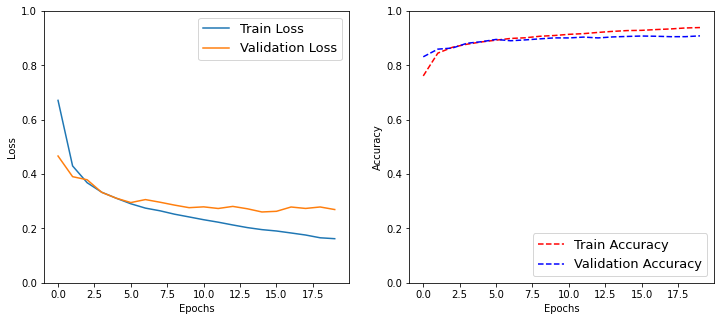

In [39]:
import pandas as pd
hist = pd.DataFrame(allScores.history)
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(hist.index, hist["loss"], label='Train Loss')
ax[0].plot(hist.index, hist["val_loss"], label='Validation Loss')
ax[0].set_ylabel("Loss")
ax[0].set_ylim([0, 1])
ax[0].set_xlabel("Epochs")
ax[0].legend(fancybox=True, prop={'size':13}, loc='upper right')

ax[1].plot(hist.index, hist["accuracy"], 'r--', label='Train Accuracy')
ax[1].plot(hist.index, hist["val_accuracy"], 'b--', label='Validation Accuracy')
ax[1].set_ylabel("Accuracy")
ax[1].set_ylim([0, 1])
ax[1].set_xlabel("Epochs")
ax[1].legend(fancybox=True, prop={'size':13}, loc='lower right')
plt.show()

### 4.2.4 Report metric score on test set

In [40]:
y_test_shaped = y_test.reshape((y_test.shape[0], 1, 1, y_test.shape[1]))
score = cnn.evaluate(X_test, y_test_shaped, verbose=1)
print("Test loss:\t{:.3f}".format(score[0]))
print("Test accuracy:\t{:.3f}".format(score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.2909 - accuracy: 0.9019
Test loss:	0.291
Test accuracy:	0.902


**What do you see from the plots? Are there signs of overfitting? If so, what are 
the signs and what techniques can we use to combat overfitting?**

##### Though train loss and accuracy are improving, this is not the case with validation loss near the end. Some signs of overfitting are that validation loss is stagnating and has started to increase near the end, and validation accuracy has also platued. To address this, we can use drop-out layers and batch-normalization.

### 4.3 Overfitting

### 4.3.1 Drop-out

To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.5. Train the model again for 15 epochs, use two plots to display train vs validation metric scores and train vs validation loss over each epoch. Report model performance on test set. What's your observation?

In [50]:
from tensorflow.keras.layers import Dropout

img_rows, img_cols = X_train[0].shape[0], X_train[0].shape[1]
input_shape = (img_rows, img_cols, 1)
num_classes = len(np.unique(ydev))

cnn_dropout = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding="same", activation='relu', input_shape=input_shape),
    Dropout(.5),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(16, kernel_size=(5, 5), padding="valid", activation='relu'),
    Dropout(.5),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(120, kernel_size=(5, 5), activation='relu'),
    Dropout(.5),
    
    Dense(84, activation='relu'),
    Dropout(.5),
    Dense(num_classes, activation='softmax')
])

In [51]:
y_train_shaped = y_train.reshape((y_train.shape[0], 1, 1, y_train.shape[1]))
y_val_shaped = y_val.reshape((y_val.shape[0], 1, 1, y_val.shape[1]))

In [52]:
cnn_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
allScores = cnn_dropout.fit(X_train, y_train_shaped, batch_size=128, epochs=15, verbose=1, validation_data=(X_val, y_val_shaped))


Epoch 1/15
375/375 [==============================] - 6s 14ms/step - loss: 0.9365 - accuracy: 0.6582 - val_loss: 0.7370 - val_accuracy: 0.8032
Epoch 2/15
375/375 [==============================] - 5s 14ms/step - loss: 0.6152 - accuracy: 0.7803 - val_loss: 0.6405 - val_accuracy: 0.8368
Epoch 3/15
375/375 [==============================] - 5s 14ms/step - loss: 0.5535 - accuracy: 0.8050 - val_loss: 0.6120 - val_accuracy: 0.8474
Epoch 4/15
375/375 [==============================] - 5s 14ms/step - loss: 0.5112 - accuracy: 0.8187 - val_loss: 0.5185 - val_accuracy: 0.8599
Epoch 5/15
375/375 [==============================] - 5s 14ms/step - loss: 0.4892 - accuracy: 0.8288 - val_loss: 0.4872 - val_accuracy: 0.8612
Epoch 6/15
375/375 [==============================] - 5s 14ms/step - loss: 0.4682 - accuracy: 0.8357 - val_loss: 0.4713 - val_accuracy: 0.8633
Epoch 7/15
375/375 [==============================] - 5s 14ms/step - loss: 0.4556 - accuracy: 0.8385 - val_loss: 0.4495 - val_accuracy: 0.8645

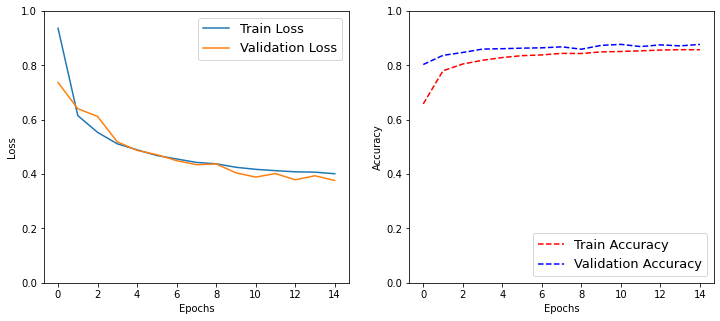

In [53]:
hist = pd.DataFrame(allScores.history)
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(hist.index, hist["loss"], label='Train Loss')
ax[0].plot(hist.index, hist["val_loss"], label='Validation Loss')
ax[0].set_ylabel("Loss")
ax[0].set_ylim([0, 1])
ax[0].set_xlabel("Epochs")
ax[0].legend(fancybox=True, prop={'size':13}, loc='upper right')

ax[1].plot(hist.index, hist["accuracy"], 'r--', label='Train Accuracy')
ax[1].plot(hist.index, hist["val_accuracy"], 'b--', label='Validation Accuracy')
ax[1].set_ylabel("Accuracy")
ax[1].set_ylim([0, 1])
ax[1].set_xlabel("Epochs")
ax[1].legend(fancybox=True, prop={'size':13}, loc='lower right')
plt.show()

In [54]:
y_test_shaped = y_test.reshape((y_test.shape[0], 1, 1, y_test.shape[1]))
score = cnn_dropout.evaluate(X_test, y_test_shaped, verbose=1)
print("Test loss:\t{:.3f}".format(score[0]))
print("Test accuracy:\t{:.3f}".format(score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3816 - accuracy: 0.8742
Test loss:	0.382
Test accuracy:	0.874


**Observation**

##### We can see that the Validation Loss seems to be steadily decreasing, and matches along well with the train loss. This is a good indication that the model is learning properly, and may even benefit from additional epochs. The accuracy also seems to be slightly improving for both training and validation data. Dropout simulates ensembling, so it makes sense that this would help prevent overfitting.

### 4.3.2 Batch Normalization

This time, let's apply a batch normalization after every hidden layer, train the model for 15 epochs, plot the metric scores and loss values, and report model performance on test set as above. Compare this technique with the original model and with dropout, which technique do you think helps with overfitting better?

In [112]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
cnn_batch_norm = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding="same", input_shape=input_shape),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(16, kernel_size=(5, 5), padding="valid"),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(120, kernel_size=(5, 5)),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(84),
    BatchNormalization(),
    Activation('relu'),
    Dense(num_classes, activation='softmax')
])

In [113]:
cnn_batch_norm.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
allScores = cnn_batch_norm.fit(X_train, y_train_shaped, batch_size=128, epochs=15, verbose=1, validation_data=(X_val, y_val_shaped))

Epoch 1/15
375/375 [==============================] - 7s 17ms/step - loss: 0.4488 - accuracy: 0.8440 - val_loss: 0.4485 - val_accuracy: 0.8380
Epoch 2/15
375/375 [==============================] - 6s 16ms/step - loss: 0.2957 - accuracy: 0.8917 - val_loss: 0.3155 - val_accuracy: 0.8821
Epoch 3/15
375/375 [==============================] - 6s 16ms/step - loss: 0.2547 - accuracy: 0.9055 - val_loss: 0.3130 - val_accuracy: 0.8842
Epoch 4/15
375/375 [==============================] - 6s 16ms/step - loss: 0.2282 - accuracy: 0.9152 - val_loss: 0.3114 - val_accuracy: 0.8890
Epoch 5/15
375/375 [==============================] - 6s 16ms/step - loss: 0.2019 - accuracy: 0.9252 - val_loss: 0.3114 - val_accuracy: 0.8844
Epoch 6/15
375/375 [==============================] - 6s 16ms/step - loss: 0.1879 - accuracy: 0.9293 - val_loss: 0.2942 - val_accuracy: 0.8964
Epoch 7/15
375/375 [==============================] - 6s 16ms/step - loss: 0.1730 - accuracy: 0.9365 - val_loss: 0.2855 - val_accuracy: 0.8989

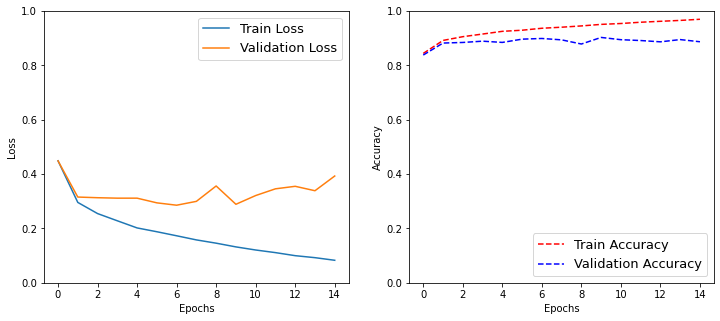

In [114]:
hist = pd.DataFrame(allScores.history)
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(hist.index, hist["loss"], label='Train Loss')
ax[0].plot(hist.index, hist["val_loss"], label='Validation Loss')
ax[0].set_ylabel("Loss")
ax[0].set_ylim([0, 1])
ax[0].set_xlabel("Epochs")
ax[0].legend(fancybox=True, prop={'size':13}, loc='upper right')

ax[1].plot(hist.index, hist["accuracy"], 'r--', label='Train Accuracy')
ax[1].plot(hist.index, hist["val_accuracy"], 'b--', label='Validation Accuracy')
ax[1].set_ylabel("Accuracy")
ax[1].set_ylim([0, 1])
ax[1].set_xlabel("Epochs")
ax[1].legend(fancybox=True, prop={'size':13}, loc='lower right')
plt.show()

In [115]:
y_test_shaped = y_test.reshape((y_test.shape[0], 1, 1, y_test.shape[1]))
score = cnn_dropout.evaluate(X_test, y_test_shaped, verbose=1)
print("Test loss:\t{:.3f}".format(score[0]))
print("Test accuracy:\t{:.3f}".format(score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3816 - accuracy: 0.8742
Test loss:	0.382
Test accuracy:	0.874


**Observation, comparison with Dropout:**

##### Upon comparison with dropout, I find that dropout is more effective, and that even with batch normalization, the model performs worse on the test set than the baseline, and also worse than dropout. The validation loss is not consistently decreasing, and the validation accuracy is staying constant while train accuracy is increasing and train loss decreases. This is a good indicator that our model is overfitting.